<a href="https://colab.research.google.com/github/michaelzchen/nuclear-arms-race/blob/main/Arms_Race_Data_Fitting_and_Sensitivity_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import solve_ivp
from scipy.optimize import minimize

# Running Arms Race On Nuclear Arsenal

In [ ]:
# Define the Caspary model
def model(t, z, p1, p2, g1, g2, C1, C2):
    x,y = z
    dxdt = p1*y + g1 + C1*(1 - np.exp(x/C1))
    dydt = p2*x + g2 + C2*(1 - np.exp(y/C2))
    return [dxdt, dydt]

In [ ]:
# Read in the data
india_pakistan = pd.read_excel("IP Nukes.xlsx")
india_pakistan = india_pakistan.T
india_pakistan.columns = india_pakistan.iloc[0]
india_pakistan = india_pakistan.iloc[1:]

In [ ]:
# Select x,y,t from the data
india = india_pakistan['India'].astype(float)
pakistan = india_pakistan['Pakistan'].astype(float)
years = india_pakistan.index

In [ ]:
# Re-name sample data for simplicity in model
x_data = india
y_data = pakistan
t_val = years

In [ ]:
# Initial Conditions: Country X at time 0, Country Y at time 0
x0 = x_data.iloc[0]
y0 = y_data.iloc[0]
z0  = [x0, y0]

# Initial Government Spending Cap, set to 1/2 US Average, divide by 6 for pakistan
C1 = 465
C2 = 213

In [ ]:
# Define Squared Error using solve_ivp
def squared_err(params):
    p1, p2, g1, g2 = params
    z = solve_ivp(model, [t_val[0], t_val[-1]], z0, args=(p1, p2, g1, g2, C1, C2),t_eval= t_val)
    x_pred, y_pred = z.y
    return np.sum((x_pred - x_data)**2) + np.sum((y_pred - y_data)**2)

In [ ]:
# Initial guess for the parameters
params0 = [.5, .5, .5, .5] 
# Bounds for the parameters
bounds = ((0, np.inf), (0, np.inf), (0, np.inf), (0, np.inf)) 
# Use minimize function to minimize squared error
result = minimize(squared_err, params0, bounds=bounds)

In [ ]:
# Print result for parameters
p1 =  result.x[0]
p2 =  result.x[1]
g1 =  result.x[2]
g2 =  result.x[3]
# Print the optimal parameters
print("p1 =", p1)
print("p2 =", p2)
print("g1 =", g1)
print("g2 =", g2)

p1 = 1.1038143473241706
p2 = 1.526243617950961
g1 = 0.0
g2 = 1.5931490981222005


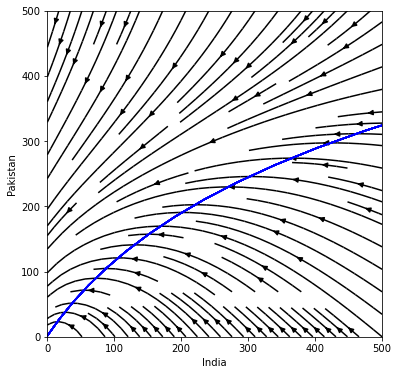

In [ ]:
# Define the range of values for x and y
x_min = 0
x_max = 500.0
y_min = 0
y_max = 500.0

# Create a grid of x and y values
num_points = 20
x_values = np.linspace(x_min, x_max, num_points)
y_values = np.linspace(y_min, y_max, num_points)
X, Y = np.meshgrid(x_values, y_values)

# Calculate the nullclines
nullcline_x = -(g1 + C1*(1 - np.exp(X/C1))) / p1
nullcline_y = -(g2 + C2*(1 - np.exp(Y/C2))) / p2

# Evaluate the model at each point in the grid
DX, DY = model(0, [X, Y], p1, p2, g1, g2, C1, C2)

# Plot the vector field
fig, ax = plt.subplots(figsize=(6, 6))
ax.streamplot(X, Y, DX, DY, density=1.0, color='k')

# Plot the nullclines
ax.plot(X, nullcline_x, 'r-')
ax.plot(nullcline_y, Y, 'b-')

# Set the axis limits and labels
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_xlabel('India')
ax.set_ylabel('Pakistan')

plt.show()

# Residual Analysis

### Residual Plot

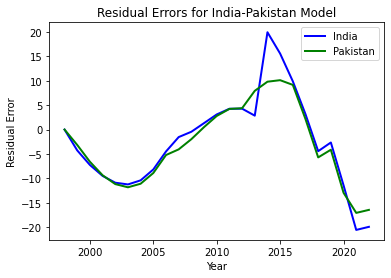

In [ ]:
# Get the estimated values of x and y using optimal parameters from above
optimal_params = result.x
z_pred = solve_ivp(model, [t_val[0], t_val[-1]], z0, args=tuple(optimal_params) + (C1, C2), t_eval=t_val)
x_pred, y_pred = z_pred.y

# Calculate the residual errors
x_resid = x_pred - x_data
y_resid = y_pred - y_data

# Plot the results
fig, ax = plt.subplots()
ax.plot(t_val, x_resid, label='India', linestyle='-', linewidth=2, color='blue')
ax.plot(t_val, y_resid, label='Pakistan', linestyle='-', linewidth=2, color='green')

# Set the title and axis labels
ax.set_title('Residual Errors for India-Pakistan Model')
ax.set_xlabel('Year')
ax.set_ylabel('Residual Error')
ax.legend()
plt.show()

### Model over Time comparison

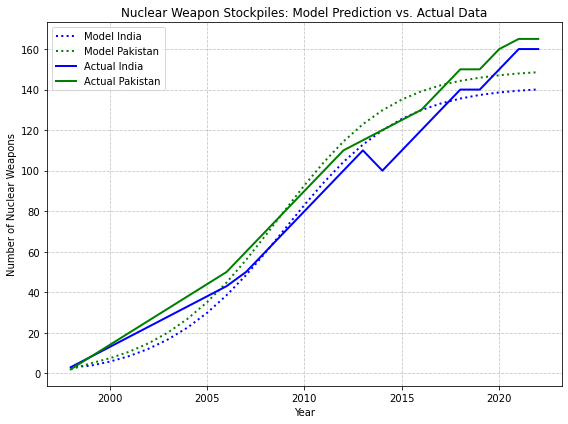

In [ ]:
# Plot the actual data versus model estimated
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(t_val, x_pred, label='Model India', color='blue', linestyle='dotted', linewidth=2)
ax.plot(t_val, y_pred, label='Model Pakistan', color='green', linestyle='dotted', linewidth=2)
ax.plot(t_val, x_data, label='Actual India', color='blue', linestyle='-', linewidth=2)
ax.plot(t_val, y_data, label='Actual Pakistan', color='green', linestyle='-', linewidth=2)

# Add title labels and legend
ax.set_title('Nuclear Weapon Stockpiles: Model Prediction vs. Actual Data')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Nuclear Weapons')
ax.legend(loc='upper left')

# Style
ax.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Sensitivity Analysis

In [ ]:
def sensitivity(params):
    p1, p2, g1, g2, C1, C2 = params
    z = solve_ivp(model, [t_val[0], t_val[-1]], z0, args=(p1, p2, g1, g2, C1, C2),t_eval= t_val)
    x_pred, y_pred = z.y
    return(x_pred, y_pred)

### P1 and P2

In [ ]:
#xpred,ypred = sensitivity([p1,p2,g1,g2,C1,C2])

p12_options = np.arange(0, 4.5, 0.2)
p1 = 1.10381251357372
p2 = 1.5262486252509055
g1 = 0.0
g2 = 1.5930878766203929
C1 = 465
C2 = 213

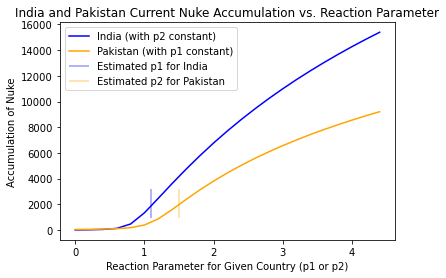

In [ ]:
listoutcomes_ind = []
listoutcomes_pak = []
for p_option in p12_options:
    indiapred = sensitivity([p_option, p2, g1, g2, C1, C2])[0]
    pakistanpred = sensitivity([p1, p_option, g1, g2, C1, C2])[1]
    listoutcomes_ind.append(sum(indiapred))
    listoutcomes_pak.append(sum(pakistanpred))
plt.plot(p12_options, listoutcomes_ind, label = "India (with p2 constant)",color = "blue")
plt.plot(p12_options, listoutcomes_pak, label = "Pakistan (with p1 constant)",color = "orange")
plt.title("India and Pakistan Current Nuke Accumulation vs. Reaction Parameter")
plt.xlabel('Reaction Parameter for Given Country (p1 or p2)')
plt.ylabel('Accumulation of Nuke')
plt.vlines(x = 1.1, ymin = 900, ymax = 3200,
           colors = 'blue', alpha = 0.4,
           label = 'Estimated p1 for India')
plt.vlines(x = 1.5, ymin = 900, ymax = 3200,
           colors = 'orange', alpha = 0.4,
           label = 'Estimated p2 for Pakistan')
plt.legend()
#plt.figure(figsize=(40,10)) 
plt.show()

In [ ]:
#Sensitivity Reaction Parameter
total_escalation = []
for p1_temp in p12_options:
    p1_list = []
    for p2_temp in p12_options:
        xpred,ypred = sensitivity([p1_temp,p2_temp,g1,g2, C1, C2])
        #p1_list.append(sum(xpred+ypred))
        p1_list.append(xpred[-1]+ypred[-1])
        #p1_list.append(xpred[-1]/ypred[-1])
        #p1_list.append(np.mean(xpred/ypred))
    total_escalation.append(p1_list)


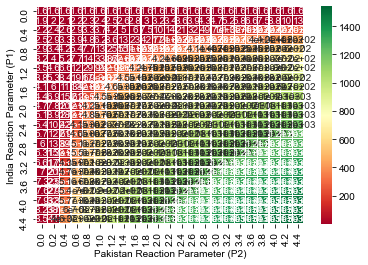

In [ ]:
import seaborn as sns
clean_p12 = [ '%.1f' % elem for elem in p12_options ]
total_escalationdf = pd.DataFrame(total_escalation, columns = clean_p12, index = clean_p12)

sns.heatmap(total_escalationdf, cmap ='RdYlGn', linewidths = 0.30, annot = True);
sns.set(font_scale=0.2);
sns.set(rc={'figure.figsize':(14,9)});
plt.ylabel('India Reaction Parameter (P1)');
plt.xlabel('Pakistan Reaction Parameter (P2)');

###  C1 and C2 Constraints

In [ ]:
c1_options = range(200, 600, 20)
c2_options = range(50, 450, 20)
len(c1_options) == len(c2_options)

True

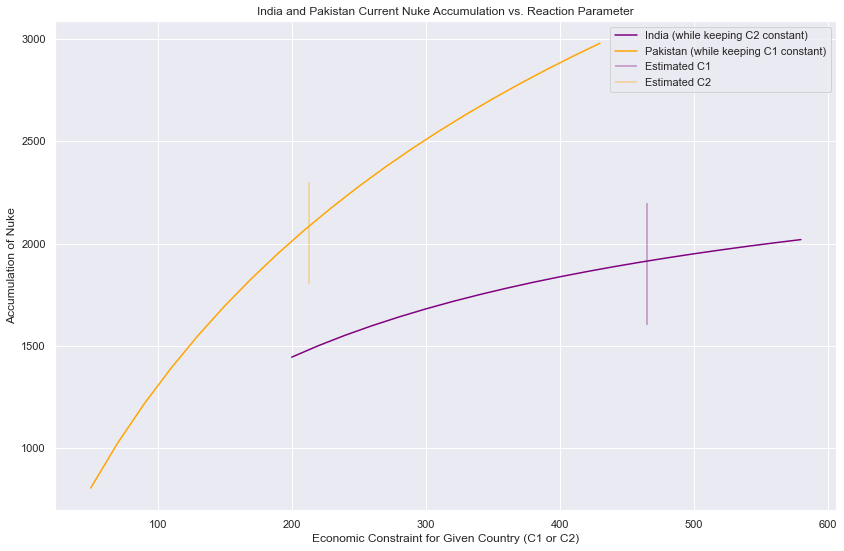

In [ ]:
listoutcomes_ind_c = []
listoutcomes_pak_c = []
for (c1_opt, c2_opt) in zip(c1_options, c2_options):
    indiapred = sensitivity([p1, p2, g1, g2, c1_opt, C2])[0]
    pakistanpred = sensitivity([p1, p2, g1, g2, C1, c2_opt])[1]
    listoutcomes_ind_c.append(sum(indiapred))
    listoutcomes_pak_c.append(sum(pakistanpred))
plt.plot(c1_options, listoutcomes_ind_c, label = "India (while keeping C2 constant)", color = "purple")
plt.plot(c2_options, listoutcomes_pak_c, label = "Pakistan (while keeping C1 constant)", color = "orange")
plt.vlines(x = 465, ymin = 1600, ymax = 2200,
           colors = 'purple', alpha = 0.4,
           label = 'Estimated C1')
plt.vlines(x = 213, ymin = 1800, ymax = 2300,
           colors = 'orange', alpha = 0.4,
           label = 'Estimated C2')
plt.title("India and Pakistan Current Nuke Accumulation vs. Reaction Parameter")
plt.xlabel('Economic Constraint for Given Country (C1 or C2)')
plt.ylabel('Accumulation of Nuke')
plt.legend()
#plt.figure(figsize=(40,10)) 
plt.show()

In [ ]:
#Sensitivity Reaction Parameter
total_escalation_c = []
for c1_temp in c1_options:
    c1_list = []
    for c2_temp in c2_options:
        xpred,ypred = sensitivity([p1,p2,g1,g2, c1_temp, c2_temp])
        #c1_list.append(sum(xpred+ypred))
        #c1_list.append(xpred[-1]+ypred[-1])
        #c1_list.append(xpred[-1]/ypred[-1])
        c1_list.append(np.mean(xpred/ypred))
    total_escalation_c.append(c1_list)


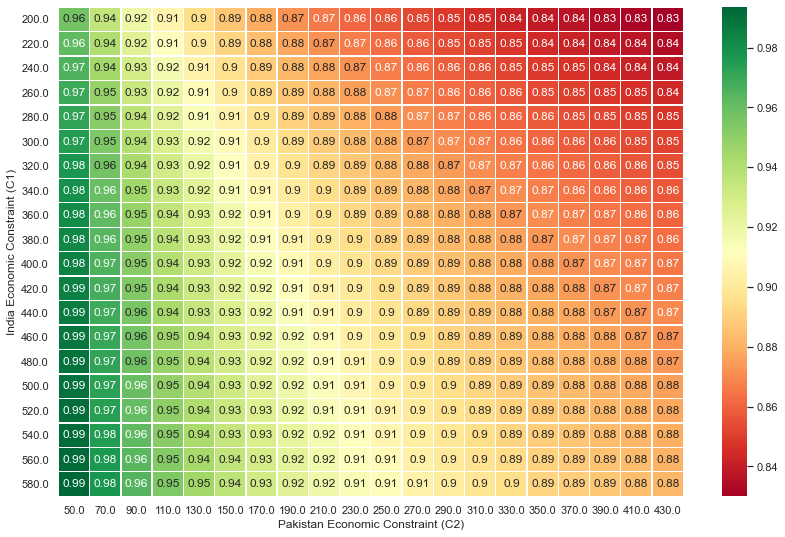

In [ ]:
import seaborn as sns
clean_c1 = [ '%.1f' % elem for elem in c1_options ]
clean_c2 = [ '%.1f' % elem for elem in c2_options ]
total_escalationdf_c = pd.DataFrame(total_escalation_c, columns = clean_c2, index = clean_c1)

sns.heatmap(total_escalationdf_c, cmap ='RdYlGn', linewidths = 0.30, annot = True);
sns.set(font_scale=10);
sns.set(rc={'figure.figsize':(14,9)});
plt.ylabel('India Economic Constraint (C1)');
plt.xlabel('Pakistan Economic Constraint (C2)');